## data augmentation
7 images are not enough for a deep learning model training. So more data were generated from these seven images.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2021-04-07 21_36_40_exai_rpi_004_51.jpg to 2021-04-07 21_36_40_exai_rpi_004_51.jpg
Saving 2021-04-07 21_37_18_exai_rpi_001_58.jpg to 2021-04-07 21_37_18_exai_rpi_001_58.jpg
Saving 2021-04-07 21_39_06_exai_rpi_001_85.jpg to 2021-04-07 21_39_06_exai_rpi_001_85.jpg
Saving 2021-04-07 21_39_20_exai_rpi_004_91.jpg to 2021-04-07 21_39_20_exai_rpi_004_91.jpg
Saving 2021-04-07 21_40_10_exai_rpi_001_101.jpg to 2021-04-07 21_40_10_exai_rpi_001_101.jpg
Saving 2021-04-07 21_43_40_exai_rpi_004_156.jpg to 2021-04-07 21_43_40_exai_rpi_004_156.jpg
Saving 2021-04-07 21_45_00_exai_rpi_004_176.jpg to 2021-04-07 21_45_00_exai_rpi_004_176.jpg


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
import numpy as np
from skimage import io
import os
from PIL import Image


image_directory = 'woods/'
my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = io.imread(image_directory + image_name)
        print(image.shape)

        # image = Image.fromarray(image, 'RGB')
        # image = image.resize((SIZE,SIZE))
        # dataset.append(np.array(image))

(1952, 2592, 3)
(1952, 2592, 3)
(1952, 2592, 3)
(1952, 2592, 3)
(1952, 2592, 3)
(1952, 2592, 3)
(1952, 2592, 3)


Due to the limited computation resources, we generate about 150 images for the data augmentation. The data augmentation methods inclued changing brightness, rotation, width shifting, height shifting, sheering, zooming and flipping. We choosed the 'reflect' method for filling the images because it is more consistant with the original images.

In [ ]:
dataset = []

datagen = ImageDataGenerator(
        brightness_range=[0.2,1.0],
        rotation_range=45,     #Random rotation between 0 and 45
        width_shift_range=0.2,   #% shift
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='reflect')    #Also try nearest, constant, reflect, wrap

# my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = io.imread(image_directory + image_name)
        image = Image.fromarray(image, 'RGB')
        # image = image.resize((SIZE,SIZE))
        dataset.append(np.array(image))

x = np.array(dataset)
  
i = 0
for batch in datagen.flow(x, batch_size=16,  
                          save_to_dir='augmented_pics', 
                          save_prefix='aug', 
                          save_format='jpg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [ ]:
print(i)
len(os.listdir('augmented_pics/'))

21


147

In [ ]:
!zip file.zip augmented_pics/*.jpg

  adding: augmented_pics/aug_0_1309.jpg (deflated 2%)
  adding: augmented_pics/aug_0_1662.jpg (deflated 2%)
  adding: augmented_pics/aug_0_1761.jpg (deflated 2%)
  adding: augmented_pics/aug_0_2398.jpg (deflated 2%)
  adding: augmented_pics/aug_0_3640.jpg (deflated 2%)
  adding: augmented_pics/aug_0_3.jpg (deflated 2%)
  adding: augmented_pics/aug_0_4790.jpg (deflated 2%)
  adding: augmented_pics/aug_0_4817.jpg (deflated 2%)
  adding: augmented_pics/aug_0_4926.jpg (deflated 2%)
  adding: augmented_pics/aug_0_4930.jpg (deflated 2%)
  adding: augmented_pics/aug_0_5099.jpg (deflated 1%)
  adding: augmented_pics/aug_0_5495.jpg (deflated 2%)
  adding: augmented_pics/aug_0_6043.jpg (deflated 2%)
  adding: augmented_pics/aug_0_6621.jpg (deflated 1%)
  adding: augmented_pics/aug_0_6913.jpg (deflated 2%)
  adding: augmented_pics/aug_0_8125.jpg (deflated 2%)
  adding: augmented_pics/aug_0_8366.jpg (deflated 2%)
  adding: augmented_pics/aug_0_8380.jpg (deflated 2%)
  adding: augmented_pics/aug_0_

In [ ]:
from google.colab import files
files.download("/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The 7 pictures were augmented to 147 images. Togetger with the 7 original images, there are 154 images in total. (Due to the computation capability, more images were not created.

## Label the images
A labelling software, roboflow was applied to the images. Two classes was given: Knot and crack. One example picture of the labelling resulting.
![example results](https://drive.google.com/uc?export=view&id=1j6gGijonQgkNxp6BPZKQZwHoDWEX3k4K)



In [ ]:
import os
import torch
from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.9.0+cu102 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


## deep learning Model
Because this is a object detection problem, a YoloV3 model was applied.

In [ ]:
!git clone https://github.com/roboflow-ai/yolov3 

Cloning into 'yolov3'...
remote: Enumerating objects: 8443, done.
remote: Total 8443 (delta 0), reused 0 (delta 0), pack-reused 8443
Receiving objects: 100% (8443/8443), 6.89 MiB | 28.92 MiB/s, done.
Resolving deltas: 100% (5825/5825), done.


In [ ]:
# Get Data from Roboflow
!curl -L https://app.roboflow.com/ds/vQ6H9Q95O3?key=EEzyHn712l | jar -x


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   890  100   890    0     0   1286      0 --:--:-- --:--:-- --:--:--  1286
100  107M  100  107M    0     0  63.8M      0  0:00:01  0:00:01 --:--:--  109M
(23) Failed writing body


The training and valiadation set were splited by the labelling software.(125 images for training, 20 images for valiadtion, 9 for testing.) 

In [ ]:
%cd train

/content/train


In [ ]:
%ls

2021-04-07-21_36_40_exai_rpi_004_51_jpg.rf.c0debda57604d1c2f2d0cda71b8b37f3.jpg
2021-04-07-21_36_40_exai_rpi_004_51_jpg.rf.c0debda57604d1c2f2d0cda71b8b37f3.txt
2021-04-07-21_39_06_exai_rpi_001_85_jpg.rf.a38cba6d86f0e48aeb846d39794fffe1.jpg
2021-04-07-21_39_06_exai_rpi_001_85_jpg.rf.a38cba6d86f0e48aeb846d39794fffe1.txt
2021-04-07-21_39_20_exai_rpi_004_91_jpg.rf.047549fbd2f49cbba55e9ebb9fb4d330.jpg
2021-04-07-21_39_20_exai_rpi_004_91_jpg.rf.047549fbd2f49cbba55e9ebb9fb4d330.txt
2021-04-07-21_43_40_exai_rpi_004_156_jpg.rf.fcd15e6790941a627afa6a55140270fd.jpg
2021-04-07-21_43_40_exai_rpi_004_156_jpg.rf.fcd15e6790941a627afa6a55140270fd.txt
2021-04-07-21_45_00_exai_rpi_004_176_jpg.rf.4f58e40cd1c2b25484415204c855a685.jpg
2021-04-07-21_45_00_exai_rpi_004_176_jpg.rf.4f58e40cd1c2b25484415204c855a685.txt
aug_0_1309_jpg.rf.eb45707bbc4ac236ba3de2db2772fd96.jpg
aug_0_1309_jpg.rf.eb45707bbc4ac236ba3de2db2772fd96.txt
aug_0_1761_jpg.rf.209f170e9837b8be221bbf7d0b048c76.jpg
aug_0_1761_jpg.rf.209f170e9837b

In [ ]:
%mkdir labels
%mkdir images

In [ ]:
%mv *.jpg ./images/
%mv *.txt ./labels/

In [ ]:
%cd images

/content/train/images


In [ ]:
# create Ultralytics specific text file of training images
file = open("train_images_roboflow.txt", "w") 
for root, dirs, files in os.walk("."):
    for filename in files:
      # print("../train/images/" + filename)
      if filename == "train_images_roboflow.txt":
        pass
      else:
        file.write("../train/images/" + filename + "\n")
file.close()

In [ ]:
%cat train_images_roboflow.txt

../train/images/aug_0_9427_jpg.rf.e7f6025ad0e1c00c4b9e5c94508c0ecf.jpg
../train/images/aug_2_4312_jpg.rf.a3d81dd53e1df912af774772f421f790.jpg
../train/images/aug_5_2499_jpg.rf.201107d8f492c3984e5f49ab93f3ccdb.jpg
../train/images/aug_5_5781_jpg.rf.e7b8396ec6cc0a2d7e483c0c5a56ca6e.jpg
../train/images/aug_3_4983_jpg.rf.66383d1bea9db4328699a53cc9faf526.jpg
../train/images/aug_2_3058_jpg.rf.b2bad818b75b2a04ee03dd767f33ce0e.jpg
../train/images/aug_5_7179_jpg.rf.f3f4b09fe728d864c3831e4abac2cf56.jpg
../train/images/aug_5_2263_jpg.rf.a4f2ee1393504e54cf703a1873c19e0b.jpg
../train/images/aug_2_642_jpg.rf.61ba8d058d0a560679924d648973cf1b.jpg
../train/images/aug_5_8011_jpg.rf.5bcdaa3bd603566e06fbd39491e7e75a.jpg
../train/images/aug_1_9984_jpg.rf.ab400209386c7ee3ba90683400f92675.jpg
../train/images/aug_5_6606_jpg.rf.7e7b79470b556852b8b97438c00c9f54.jpg
../train/images/aug_4_4124_jpg.rf.95b30a0455943de7e3104114a196356c.jpg
../train/images/aug_4_2637_jpg.rf.1f3eb16c4588333ecab8b91332fe890c.jpg
../trai

In [ ]:
%cd ../../valid

/content/valid


In [ ]:
%mkdir labels
%mkdir images

In [ ]:
%mv *.jpg ./images/
%mv *.txt ./labels/

In [ ]:
%cd images

/content/valid/images


In [ ]:
# create Ultralytics specific text file of validation images
file = open("valid_images_roboflow.txt", "w") 
for root, dirs, files in os.walk("."):
    for filename in files:
      # print("../train/images/" + filename)
      if filename == "valid_images_roboflow.txt":
        pass
      else:
        file.write("../valid/images/" + filename + "\n")
file.close()

In [ ]:
%cat valid_images_roboflow.txt

../valid/images/aug_5_6335_jpg.rf.71d9fa0ab8e8fb9764a1d3c0e329aac4.jpg
../valid/images/aug_3_6895_jpg.rf.b8ca58599c46fc52560f528dcb9770b7.jpg
../valid/images/aug_1_9431_jpg.rf.d276c6502e88e0149b3e5c9607596563.jpg
../valid/images/aug_5_1644_jpg.rf.b8abe928814e1dc1195a93d3d6cf251a.jpg
../valid/images/aug_3_7619_jpg.rf.2624374ca41adb00e7d4891c6641728e.jpg
../valid/images/2021-04-07-21_37_18_exai_rpi_001_58_jpg.rf.1f40fe5deb73ef3a9eb1d7c5ac275466.jpg
../valid/images/aug_4_3197_jpg.rf.6b10ee52fc5636fb2dbcab4bad1847be.jpg
../valid/images/aug_2_9536_jpg.rf.dea9b3f33238764268ed50ed2c936d1f.jpg
../valid/images/aug_4_7343_jpg.rf.bf03e4faa29c0a081dfd89b52de00bef.jpg
../valid/images/aug_4_9436_jpg.rf.3e00ff92361ca4eda3bc5086bde5780c.jpg
../valid/images/aug_6_6462_jpg.rf.9d8bbc71c729e34f662c2000aa6e3f6c.jpg
../valid/images/aug_4_8826_jpg.rf.08b74373426840da63d962b69498c1ed.jpg
../valid/images/aug_6_5722_jpg.rf.9f5464c9be04b40c2724680e9bea121f.jpg
../valid/images/aug_4_7117_jpg.rf.34e502b14e957e9a0e

## Set up model config
This requires editing the `roboflow.data` file, which tells our model where to find our data, our numbers of classes, and our class label names.
But we need to update our class names. 



In [ ]:
%cd ../../yolov3/data

/content/yolov3/data


In [ ]:
# display class labels imported from Roboflow
%cat ../../train/_darknet.labels

crack
knot

In [ ]:
# convert .labels to .names for Ultralytics specification
%cat ../../train/_darknet.labels > ../../train/roboflow_data.names

In [ ]:
def get_num_classes(labels_file_path):
    classes = 0
    with open(labels_file_path, 'r') as f:
      for line in f:
        classes += 1
    return classes

In [ ]:
# update the roboflow.data file with correct number of classes
import re

num_classes = get_num_classes("../../train/_darknet.labels")
with open("roboflow.data") as f:
    s = f.read()
with open("roboflow.data", 'w') as f:
    
    # Set number of classes num_classes.
    s = re.sub('classes=[0-9]+',
               'classes={}'.format(num_classes), s)
    f.write(s)

In [ ]:
# display updated number of classes
%cat roboflow.data

classes=2
train=../train/images/train_images_roboflow.txt
valid=../valid/images/valid_images_roboflow.txt
names=../train/roboflow_data.names


## Model Training

The model is trained for 300 epochs here.

In [ ]:
%cd ../

/content/yolov3


In [ ]:
!python3 train.py --data data/roboflow.data --epochs 300

Namespace(accumulate=4, adam=False, batch_size=16, bucket='', cache_images=False, cfg='cfg/yolov3-spp.cfg', data='data/roboflow.data', device='', epochs=300, evolve=False, img_size=[416], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, var=None, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

2021-06-27 18:07:09.808856: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   2266      0 --:--:-- --:--:-- --:--:--  2266
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0   

## Display training performance

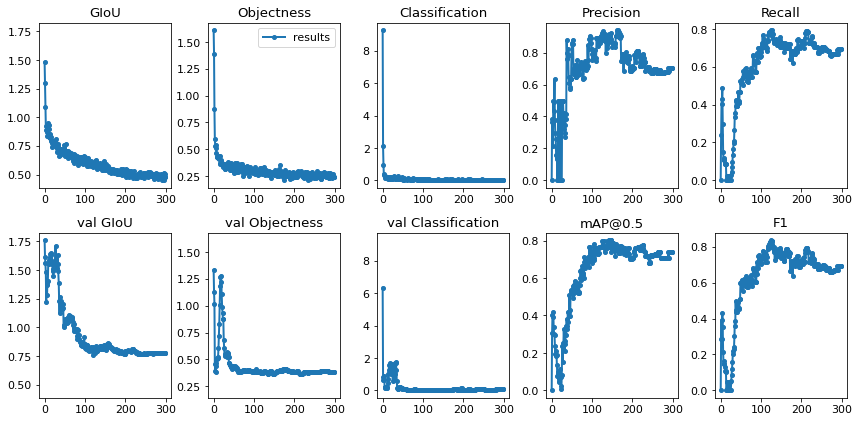

In [ ]:
from utils import utils; utils.plot_results()

300 was chosen arbitrarily. Due to the limitation computation resources, it can not be run for longer time. It looks that the best performance is at around 140 epoche. It looks like the model is a bit overfiting, but may be the performance can continue to improve after longer training time.

## Results on test data



In [ ]:
!python3 detect.py --weights weights/last.pt --source=../test --names=../train/roboflow_data.names

Namespace(agnostic_nms=False, cfg='cfg/yolov3-spp.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=416, iou_thres=0.6, names='../train/roboflow_data.names', output='output', save_txt=False, source='../test', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
image 1/9 ../test/aug_0_1662_jpg.rf.21a89aa5d5eca7522cfab201ee461fbb.jpg: 320x416 3 knots, Done. (0.048s)
image 2/9 ../test/aug_0_8125_jpg.rf.601071f6ecb2a1f

In [ ]:
# import libraries for display
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Image
from glob import glob
import random
import PIL
filename = random.choice(os.listdir('./output'))

In [ ]:
# grab all images from output directory
images = [ PIL.Image.open(f) for f in glob('./output/*') ]

In [ ]:
# convert images to numPy
def img2array(im):
    if im.mode != 'RGB':
        im = im.convert(mode='RGB')
    return np.fromstring(im.tobytes(), dtype='uint8').reshape((im.size[1], im.size[0], 3))

In [ ]:
# create array of numPy images
np_images = [ img2array(im) for im in images ]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """


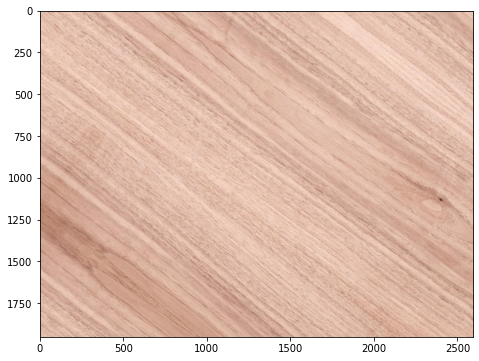

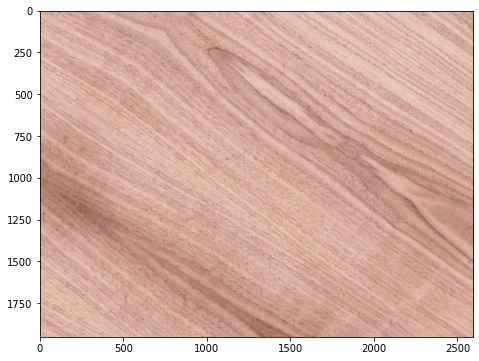

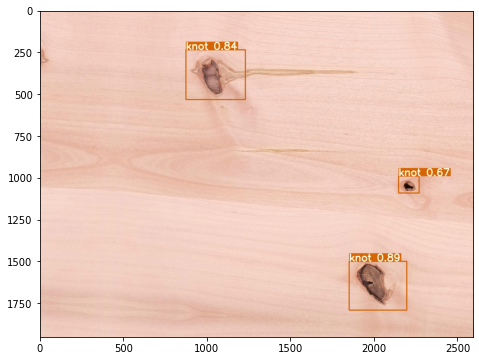

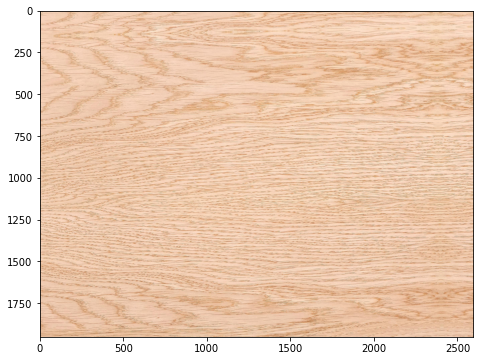

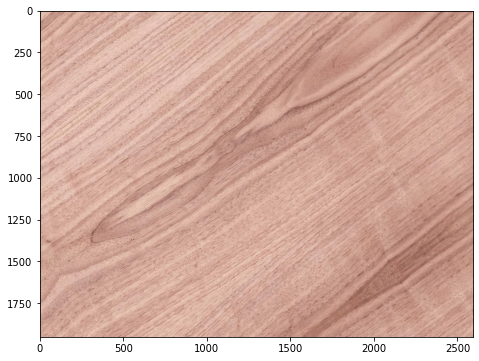

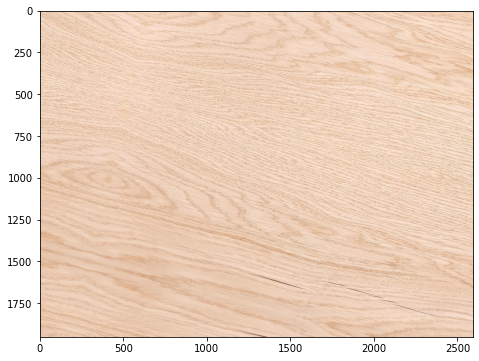

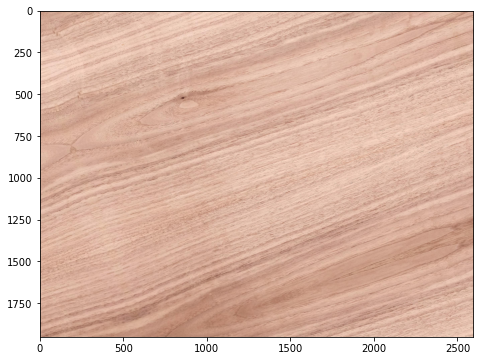

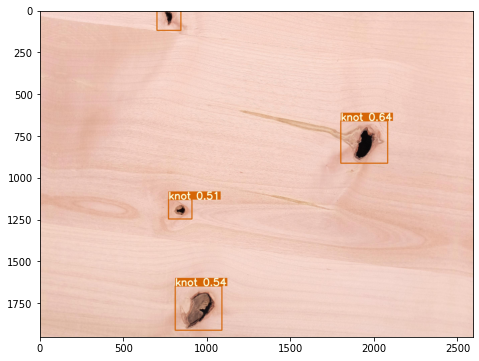

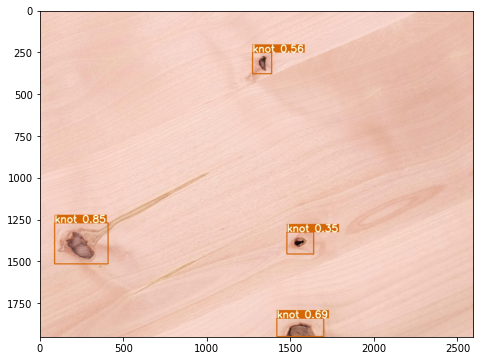

In [ ]:
# plot ALL results in test directory
for img in np_images:
    plt.figure(figsize=(8, 6))
    plt.imshow(img)

On the 9 test images, the result looks fine. The knots were successfully detected and there were no wrong classification.

## How to improve model
For the data preparation part: 

A more percise labelling can be done. I was doing analysis based on my understanding of the 'anormalies'. I gave two type of 'anormalies': knot and crack. My labelling process may not be 100 percent correct. 

Generate more data: The data augmentation got only 154 images in total, which may not be enough. More data may improve the model performance.

For the model training part:

Longer training time will help us know if the status of the model: overfitting or underfitting? Can the performance continue to improve. 

Better hyper-parameter selection: The parameters selection can be more careful. Cross-validation may be applied.

Threshold adjustment: For this anormaly detectiom problem, we can change the shreshold based on the circumstance. For example, when the anormaly will generate a big cost, we should lower the threshold.



## How to transfer learning
In this project, the problem to solve is about spot and linear-shaped scratch detection. If there is a similar problem, we can continue to use this model to do object detection. Besides, transfer learning methods can also be applied to this problem.

A simple method is to cut off the top 3 scale detection layers and replace it with a shallow structure. For example, a SVM model for a classification problem. Keep and freeze the lower weights in the trained network, fix it and train the model with the new data set. The training can be faster and the result maybe better than just do the training with the new data set.

A more complicated method is to do fine tuning. I can replace the detction layers with the a complex network regarding to the specific target domain. Only freeze the very low layers of this model (or not freeze any weight, just use the original weights to speed up the training process), train the new model with the new data set.

